In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv('data.csv')

In [9]:
df.head()

,Weight,Height
0,45,123
1,58,145
2,48,160
3,60,162
4,70,163


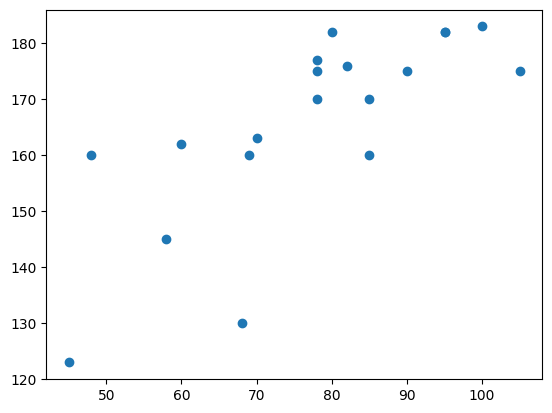

In [10]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])

In [11]:
##Coreelation
df.corr()

,Weight,Height
Weight,1.000000,0.750411
Height,0.750411,1.000000


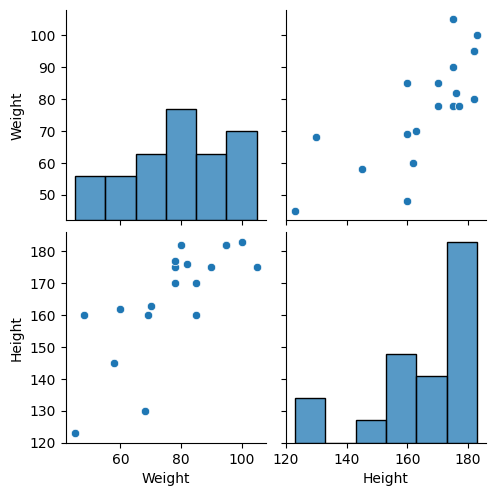

In [13]:
##Seaborn for visualization
import seaborn as sns
sns.pairplot(df)


In [17]:
##Independent and dependent features
X=df[['Weight']] ##independent deature should be data frame or 2 dimensional array
y=df['Height'] ##dependent feature can be in series of 1 dimensional array


In [18]:
np.array(X).shape ##thats the difference after adding extra [] , it makes it 2D

(19, 1)

In [19]:
np.array(y).shape ## as y feature dont have extra [] , it is 1D

(19,)

In [21]:
##Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [27]:
X_test=scaler.transform(X_test)

In [28]:
X_test

array([[-2.30623034],
       [-0.02956706],
       [ 1.14325949],
       [-1.40936299],
       [ 1.14325949]])

In [ ]:
##Apply Simple Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [32]:
regression=LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [36]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [7.21858545]
Intercept: 167.35714285714286


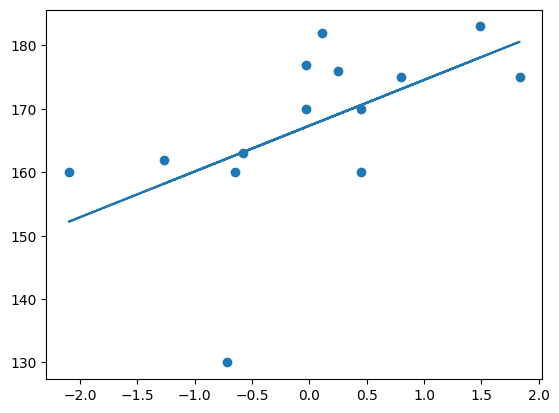

In [39]:
##plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train)) ##best fit line

In [40]:
##Prediction for test data
y_pred=regression.predict(X_test)

In [41]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

211.92793930624984
12.10590577950461
14.557744993859792


In [44]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score(y_test,y_pred)
print(score)

0.6184503469209097


In [49]:
##Prediction For new Weights(new data)
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.15565809])